<a href="https://colab.research.google.com/github/stathj/verbose-umbrella/blob/main/pdblib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터사이언스전공 202084064 최현진
## 주제: 서울시 지역 특화 도서관 선정 및 지도 도식화 - 금천구, 관악구, 강북구를 중심으로
## 변경사항: 상권 데이터 제외
---

## 서울시 공공도서관(설립주체별)(구별) 통계 (https://data.seoul.go.kr/dataList/11064/S/2/datasetView.do)
### *'자료권수 도서'와 '도서관 방문자수' 칼럼을 중심으로 가장 적은 구 3개를 파악*
## 구별 장서/대출 데이터 (https://www.data4library.kr/openDataL)
### *3개 구의 각 장서.대출 데이터로 분석 진행*
---



### 금천구 (1)

In [7]:
import pandas as pd
import numpy as np

In [9]:
gclib1 = './gclib1.csv'

In [10]:
df1 = pd.read_csv(gclib1)
print(df1)

              번호                              도서명                         저자  \
0            1.0              세계 최고의 웜뱃 피아니스트, 월리  로타 텝 글;카밀라 핀토나토 그림;김여진 옮김   
1            2.0                       너에게 행운을 줄게            방미진 지음;sujan 그림   
2            3.0         나는 매일 그려요:꼬마 무지개와 구름 강아지              우지현,이정덕 [공]지음   
3            4.0                     괜찮아, 나의 두꺼비야                   이소영 글·그림   
4            5.0    Go Go 카카오프렌즈:세계 역사 문화 체험 학습만화               김미영 글;김정한 그림   
...          ...                              ...                        ...   
232455       NaN                              NaN                        NaN   
232456  191361.0                    (얘들아!)탈춤이랑 놀자               송인현 글;한미경 그림   
232457  191362.0               (권오길 박사의)아름다운 생명일기              권오길 지음;허현경 그림   
232458  191363.0  (코믹)메이플스토리=Maple story:오프라인 RPG               송도수 글;김신중 그림   
232459  191364.0          (코믹)메이플스토리=Maple story:                        NaN   

          출판사  발행년도             ISBN   

<ipython-input-10-ba600c650c77>:1: DtypeWarning: Columns (5,6,7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(gclib1)


In [15]:
print("gclib1.csv. Shape: ",df1.shape)

gclib1.csv. Shape:  (232460, 13)


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232460 entries, 0 to 232459
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       191364 non-null  float64
 1   도서명      191364 non-null  object 
 2   저자       190818 non-null  object 
 3   출판사      188124 non-null  object 
 4   발행년도     190829 non-null  object 
 5   ISBN     191363 non-null  object 
 6   세트 ISBN  12949 non-null   object 
 7   부가기호     179256 non-null  object 
 8   권        55714 non-null   object 
 9   주제분류번호   191036 non-null  object 
 10  도서권수     191363 non-null  float64
 11  대출건수     191363 non-null  float64
 12  등록일자     191363 non-null  object 
dtypes: float64(3), object(10)
memory usage: 23.1+ MB


In [21]:
df1.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,"세계 최고의 웜뱃 피아니스트, 월리",로타 텝 글;카밀라 핀토나토 그림;김여진 옮김,브와포레,2022,9791187991229.0,NaN,7,NaN,843,1.0,0.0,2023-04-29
1,2.0,너에게 행운을 줄게,방미진 지음;sujan 그림,웅진씽크빅,2022,9788901265490.0,NaN,7,NaN,813.8,1.0,0.0,2023-04-29
2,3.0,나는 매일 그려요:꼬마 무지개와 구름 강아지,"우지현,이정덕 [공]지음",어떤우주,2022,9791196759810.0,NaN,7,NaN,813.8,1.0,0.0,2023-04-29
3,4.0,"괜찮아, 나의 두꺼비야",이소영 글·그림,글로연,2022,9788992704915.0,NaN,7,28,808.9,1.0,0.0,2023-04-29
4,5.0,Go Go 카카오프렌즈:세계 역사 문화 체험 학습만화,김미영 글;김정한 그림,북이십일,2022,9788950941901.0,9788950974091.0,7,26,909,1.0,0.0,2023-04-29


In [22]:
df1.tail()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
232455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232456,191361.0,(얘들아!)탈춤이랑 놀자,송인현 글;한미경 그림,두산동아,2004,9788900191295.0,NaN,7.0,NaN,682.11,1.0,12.0,2004-10-28
232457,191362.0,(권오길 박사의)아름다운 생명일기,권오길 지음;허현경 그림,두산동아,2004,9788900191363.0,NaN,7.0,5,82.0,1.0,24.0,2004-10-28
232458,191363.0,(코믹)메이플스토리=Maple story:오프라인 RPG,송도수 글;김신중 그림,서울문화사,2006,9788953294400.0,9788953294370.0,7.0,3,813.8,2.0,247.0,2004-10-28
232459,191364.0,(코믹)메이플스토리=Maple story:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df1.describe()

,번호,도서권수,대출건수
count,191364.000000,191363.000000,191363.000000
mean,95682.500000,1.030816,16.195889
std,55242.172794,0.199671,27.362117
min,1.000000,1.000000,0.000000
25%,47841.750000,1.000000,2.000000
50%,95682.500000,1.000000,8.000000
75%,143523.250000,1.000000,19.000000
max,191364.000000,9.000000,762.000000


In [46]:
print(df1.isnull().sum())

df_clean = df1.dropna()

df_filled = df1.fillna(0)

번호          41096
도서명         41096
저자          41642
출판사         44336
발행년도        41631
ISBN        41097
세트 ISBN    219511
부가기호        53204
권          176746
주제분류번호      41424
도서권수        41097
대출건수        41097
등록일자        41097
dtype: int64


### 관악구 (2)

In [26]:
galib2 = './galib2.csv'

In [27]:
df2 = pd.read_csv(galib2)
print(df2)

                       오프라인 RPG        송도수 글;김신중 그림     서울문화사  2008  \
NaN                         NaN                 NaN       NaN   NaN   
191365.0      만화 영화의 놀라운 진짜 이야기         윤단비 글;이흙 그림      영교출판  2004   
NaN                         NaN                 NaN       NaN   NaN   
191366.0        세상에서 가장 아름다운 달걀  헬메 하이네 글.그림;김서정 옮김       NaN  2007   
191367.0  (그림으로 만나는)대한민국 지도 그림책              이명선 그림       NaN  2004   
...                         ...                 ...       ...   ...   
223818.0               즐거운 국어교실        전국 국어교사모임 지음  내일을 여는 책  1994   
NaN                         NaN                 NaN       NaN   NaN   
NaN                         NaN                 NaN       NaN   NaN   
NaN                         NaN                 NaN       NaN   NaN   
223819.0                     불꽃                장환 저     좋은사람들  2001   

          9788953294394  9788953294370    7    2   813.8  2.1    224  \
NaN                 NaN            NaN  NaN  NaN     NaN  NaN    NaN   
191

In [28]:
print("galib2.csv. Shape: ",df2.shape)

galib2.csv. Shape:  (42767, 12)


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 42767 entries, nan to 223819.0
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   오프라인 RPG       32455 non-null  object 
 1   송도수 글;김신중 그림   32427 non-null  object 
 2   서울문화사          32235 non-null  object 
 3   2008           32434 non-null  object 
 4   9788953294394  32455 non-null  object 
 5   9788953294370  4295 non-null   float64
 6   7              29220 non-null  object 
 7   2              8241 non-null   object 
 8   813.8          31201 non-null  float64
 9   2.1            32455 non-null  float64
 10  224            32455 non-null  float64
 11  2004-10-28     32455 non-null  object 
dtypes: float64(4), object(8)
memory usage: 4.2+ MB


In [30]:
df2.head()

,오프라인 RPG,송도수 글;김신중 그림,서울문화사,2008,9788953294394,9788953294370,7,2,813.8,2.1,224,2004-10-28
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191365.0,만화 영화의 놀라운 진짜 이야기,윤단비 글;이흙 그림,영교출판,2004,9788983893512,NaN,7,NaN,688.6,1.0,23.0,2004-10-28
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191366.0,세상에서 가장 아름다운 달걀,헬메 하이네 글.그림;김서정 옮김,NaN,2007,9788982598770,NaN,7,120,808.9,1.0,145.0,2004-10-28
191367.0,(그림으로 만나는)대한민국 지도 그림책,이명선 그림,NaN,2004,9788930916370,NaN,7,NaN,981.1,1.0,79.0,2004-10-28


In [31]:
df2.tail()

,오프라인 RPG,송도수 글;김신중 그림,서울문화사,2008,9788953294394,9788953294370,7,2,813.8,2.1,224,2004-10-28
223818.0,즐거운 국어교실,전국 국어교사모임 지음,내일을 여는 책,1994,9788977465121,NaN,4,1,374.81,1.0,0.0,1970-01-01
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223819.0,불꽃,장환 저,좋은사람들,2001,9788988075128,NaN,NaN,3,813.60,1.0,0.0,1970-01-01


In [47]:
print(df2.isnull().sum())

df_clean = df2.dropna()

df_filled = df2.fillna(0)

오프라인 RPG         10312
송도수 글;김신중 그림     10340
서울문화사            10532
2008             10333
9788953294394    10312
9788953294370    38472
7                13547
2                34526
813.8            11566
2.1              10312
224              10312
2004-10-28       10312
dtype: int64


### 강북구 (3)

In [35]:
gblib3 = './gblib3.csv'

In [36]:
df3 = pd.read_csv(gblib3)
print(df3)

              번호                   도서명                 저자  \
0            1.0            일요일만 여덟 번째                 성소   
1            2.0          디자이너의 일상과 실천                권준호   
2            3.0              일인분의 안락함            에릭 딘 윌슨   
3            4.0  오늘도 열심히, 미술 수업하러 갑니다              조성희 외   
4            5.0               엄마의 가정식                오순희   
...          ...                   ...                ...   
238147  215625.0             재미있는 회계원리                이경근   
238148  215626.0               매트릭스 운명                정문교   
238149  215627.0      바티칸:바티칸 회화의 모든 것  안야 그리브 지음; 이상미 옮김   
238150  215628.0                할망은 희망                정신지   
238151  215629.0         우리말 한자어 속뜻 사전                전광진   

                             출판사  발행년도             ISBN  세트 ISBN 부가기호    권  \
0                           계수나무  2023  9791192056685.0      NaN  NaN  NaN   
1                          안그라픽스  2023  9791168232105.0      NaN  NaN  NaN   
2                            서사원 

<ipython-input-36-a5d207eeb2cb>:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(gblib3)


In [37]:
print("gblib3.csv. Shape: ",df3.shape)

gblib3.csv. Shape:  (238152, 13)


In [38]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238152 entries, 0 to 238151
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   번호       215629 non-null  float64
 1   도서명      215628 non-null  object 
 2   저자       212446 non-null  object 
 3   출판사      210518 non-null  object 
 4   발행년도     215559 non-null  object 
 5   ISBN     215629 non-null  object 
 6   세트 ISBN  11712 non-null   float64
 7   부가기호     177308 non-null  object 
 8   권        67303 non-null   object 
 9   주제분류번호   197328 non-null  object 
 10  도서권수     215629 non-null  float64
 11  대출건수     215629 non-null  float64
 12  등록일자     215629 non-null  object 
dtypes: float64(4), object(9)
memory usage: 23.6+ MB


In [39]:
df3.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1.0,일요일만 여덟 번째,성소,계수나무,2023,9791192056685.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
1,2.0,디자이너의 일상과 실천,권준호,안그라픽스,2023,9791168232105.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
2,3.0,일인분의 안락함,에릭 딘 윌슨,서사원,2023,9791168221659.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
3,4.0,"오늘도 열심히, 미술 수업하러 갑니다",조성희 외,미진사,2023,9788940860731.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28
4,5.0,엄마의 가정식,오순희,싸이프레스,2023,9791160321982.0,NaN,NaN,NaN,NaN,1.0,0.0,2023-04-28


In [40]:
df3.tail()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
238147,215625.0,재미있는 회계원리,이경근,이프레스,2016,9788990245953,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01
238148,215626.0,매트릭스 운명,정문교,봄꽃여름숲가을열매겨울뿌리,2016,9791195578566,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01
238149,215627.0,바티칸:바티칸 회화의 모든 것,안야 그리브 지음; 이상미 옮김,시그마북스,2014,9788984455771,NaN,NaN,NaN,606.92683,2.0,0.0,1970-01-01
238150,215628.0,할망은 희망,정신지,Garth laboratory(가르스연구소),2018,9791195789122,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01
238151,215629.0,우리말 한자어 속뜻 사전,전광진,LBH교육출판사,2016,9788993858341,NaN,NaN,NaN,NaN,1.0,0.0,1970-01-01


In [48]:
print(df3.isnull().sum())

df_clean = df3.dropna()

df_filled = df3.fillna(0)

번호          22523
도서명         22524
저자          25706
출판사         27634
발행년도        22593
ISBN        22523
세트 ISBN    226440
부가기호        60844
권          170849
주제분류번호      40824
도서권수        22523
대출건수        22523
등록일자        22523
dtype: int64


In [49]:
correlation = df3.corr()

<ipython-input-49-a8a28c46c4f9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df3.corr()


TypeError: ignored

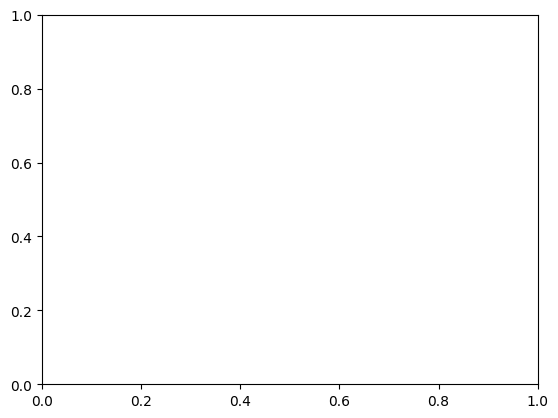

In [51]:
import matplotlib.pyplot as plt
plt.scatter(df3['부가기호'], df3['도서권수'])
plt.xlabel('부가기호')
plt.ylabel('도서권수')
plt.show()

import seaborn as sns
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()